In [2]:
import pandas as pd
from pprint import pprint

In [3]:
df = pd.read_csv("diabetic_data.csv")
df = df.drop(columns=["weight", "max_glu_serum", "payer_code"])
df = df.replace("?", "").replace("None", "")

treatments = [
    "metformin", 
    "repaglinide", 
    "nateglinide", 
    "chlorpropamide", 
    "glimepiride", 
    "acetohexamide", 
    "glipizide", 
    "glyburide", 
    "tolbutamide", 
    "pioglitazone", 
    "rosiglitazone", 
    "acarbose", 
    "miglitol", 
    "troglitazone", 
    "tolazamide", 
    "examide", 
    "citoglipton", #stiagliptin
    "insulin", 
    "glyburide-metformin", 
    "glipizide-metformin", 
    "glimepiride-pioglitazone", 
    "metformin-rosiglitazone", 
    "metformin-pioglitazone"
]

In [4]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
biglist = df.to_dict(orient='records')

#result = dict(zip(treatments, [0 for _ in range(len(treatments))]))
result = [
    [],
    [],
    [],
    [],
    [],
    [],
]

for line in biglist:
    temp = []
    for i, k in enumerate(treatments):
        if line[k] != 'No':
            temp.append(f"{i+1}-{line[k]}")
    for i, code in enumerate(temp + [0 for _ in range(6-len(temp))]):
        result[i].append(code)

In [6]:
df2 = df.drop(columns=treatments)
for i in range(6):
    df2[f"T{i+1}"] = result[i]

In [7]:
df2[df2["T6"] != 0]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,A1Cresult,change,diabetesMed,readmitted,T1,T2,T3,T4,T5,T6
15103,58316058,11065860,Caucasian,Male,[60-70),2,18,1,7,,...,,Ch,Yes,>30,1-Steady,7-Up,8-Steady,10-Steady,11-Steady,18-Steady
15727,60016020,2431710,Caucasian,Male,[60-70),2,1,7,5,,...,,Ch,Yes,<30,1-Steady,3-Steady,7-Steady,11-Steady,12-Steady,18-Steady
17043,63184686,1276191,Caucasian,Male,[80-90),1,18,7,4,,...,>8,Ch,Yes,NO,1-Steady,8-Steady,10-Steady,12-Steady,13-Steady,18-Steady
17125,63415968,9791118,Caucasian,Male,[70-80),1,18,7,4,Family/GeneralPractice,...,>8,Ch,Yes,<30,1-Up,3-Steady,7-Steady,8-Down,10-Steady,13-Steady
35673,110310714,88391925,Other,Male,[60-70),2,3,7,7,Emergency/Trauma,...,>8,Ch,Yes,>30,1-Steady,5-Steady,7-Steady,10-Steady,18-Up,19-Steady


In [8]:
df2.to_csv("diabetic_data_filtered.csv")

Avec ce premier filtrage, on réduit de 30% la taille du dataset sans perdre trop d'informations

In [9]:
df2 = df2.set_index("encounter_id").sort_index()
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,A1Cresult,change,diabetesMed,readmitted,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,,,,,,,,,,,,,,
12522,48330783,Caucasian,Female,[80-90),2,1,4,13,,68,...,,Ch,Yes,NO,7-Steady,18-Steady,0,0,0,0
15738,63555939,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,33,...,,Ch,Yes,NO,11-Steady,18-Steady,0,0,0,0
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,,51,...,,Ch,Yes,NO,7-Steady,18-Steady,0,0,0,0
28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,,47,...,,No,Yes,>30,18-Steady,0,0,0,0,0
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,,31,...,,No,Yes,>30,18-Steady,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,,51,...,>8,Ch,Yes,>30,1-Steady,18-Down,0,0,0,0
443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,,33,...,,No,Yes,NO,18-Steady,0,0,0,0,0
443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,,53,...,,Ch,Yes,NO,1-Steady,18-Down,0,0,0,0


In [10]:
# TODO : faire une analyse des fréquences d'apparition des traitements ? (en fonction du nombre de traitements adressés à une personne ?)
# TODO : nb(traitements) ~ Age
# TODO : traitement ~ ethnie

# Fréquence apparition traitements

In [110]:
def count_treatments(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[(df['T1'].str.contains(str(i)+'-', na=False) & ~df['T1'].str.contains(str(i+10)+'-', na=False)) | (df['T2'].str.contains(str(i)+'-', na=False) & ~df['T2'].str.contains(str(i+10)+'-', na=False)) | (df['T3'].str.contains(str(i)+'-', na=False) & ~df['T3'].str.contains(str(i+10)+'-', na=False)) | (df['T4'].str.contains(str(i)+'-', na=False) & ~df['T4'].str.contains(str(i+10)+'-', na=False)) | (df['T5'].str.contains(str(i)+'-', na=False) & ~df['T5'].str.contains(str(i+10)+'-', na=False)) | (df['T6'].str.contains(str(i)+'-', na=False) & ~df['T6'].str.contains(str(i+10)+'-', na=False))].count()
        contained.append(contain_values)
    return contained

In [111]:
def normalize(list_values, div):
    for i in range(len(list_values)):
        list_values[i] = list_values[i]*100/div
    return list_values

In [49]:
freq_treatments = normalize(count_treatments(df2),101766)

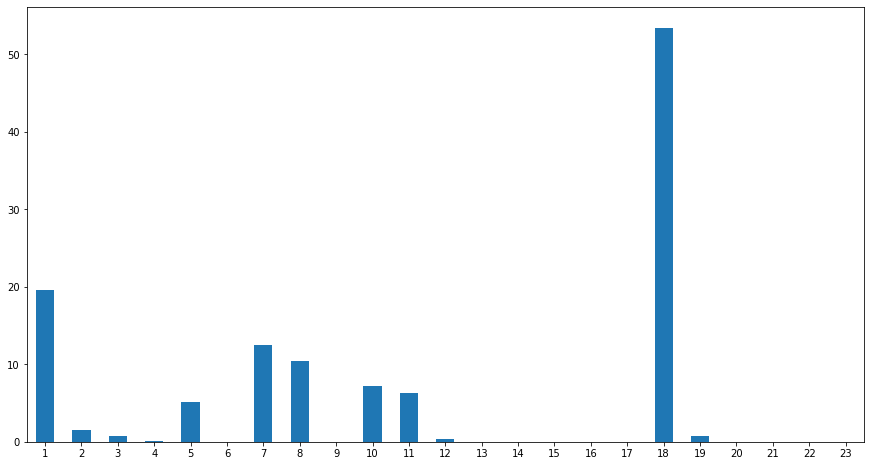

In [143]:
df_freq = pd.DataFrame(freq_treatments, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq = df_freq.rename(columns={"patient_nbr": "Treatments frequencies"})
df_freq = df_freq["Treatments frequencies"]
df_freq.plot.bar(rot=0, figsize=(15, 8))

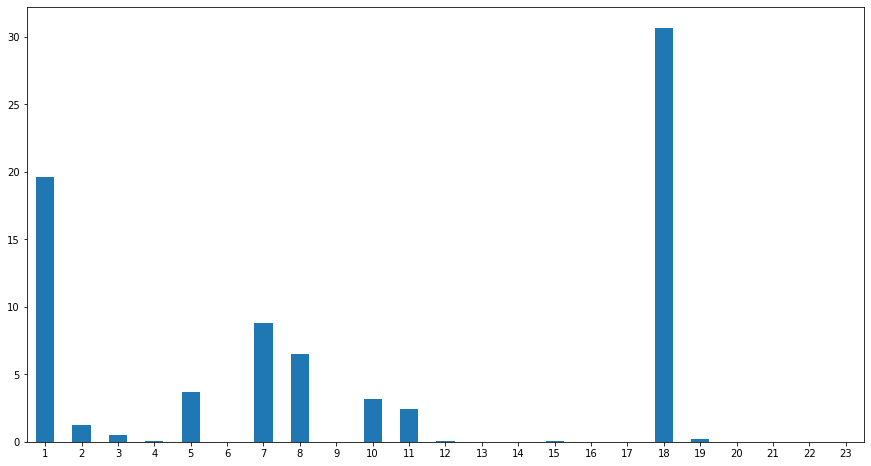

In [144]:
def count_treatments1(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T1'].str.contains(str(i)+'-', na=False) & ~df['T1'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments1 = normalize(count_treatments1(df2[["patient_nbr","T1"]]),101766)
df_freq1 = pd.DataFrame(freq_treatments1, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq1= df_freq1['patient_nbr']
df_freq1.plot.bar(rot=0, figsize=(15, 8))

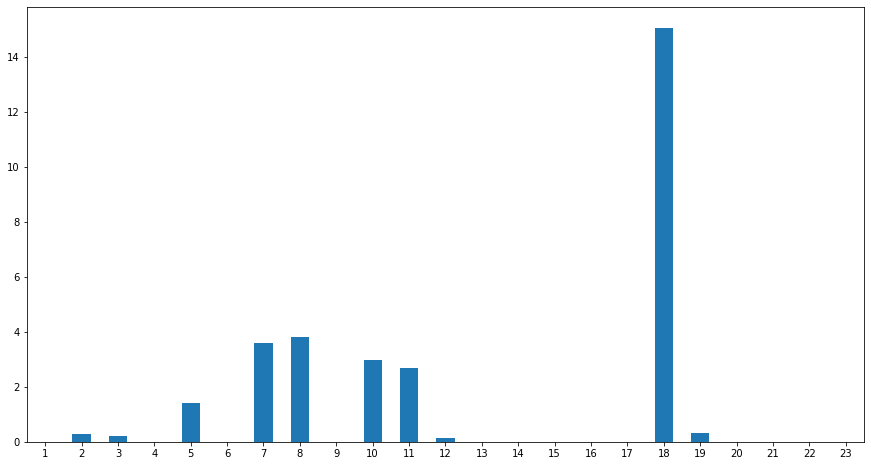

In [145]:
def count_treatments2(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T2'].str.contains(str(i)+'-', na=False) & ~df['T2'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments2 = normalize(count_treatments2(df2[["patient_nbr","T2"]]),101766)
df_freq2 = pd.DataFrame(freq_treatments2, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq2= df_freq2['patient_nbr']
df_freq2.plot.bar(rot=0, figsize=(15, 8))

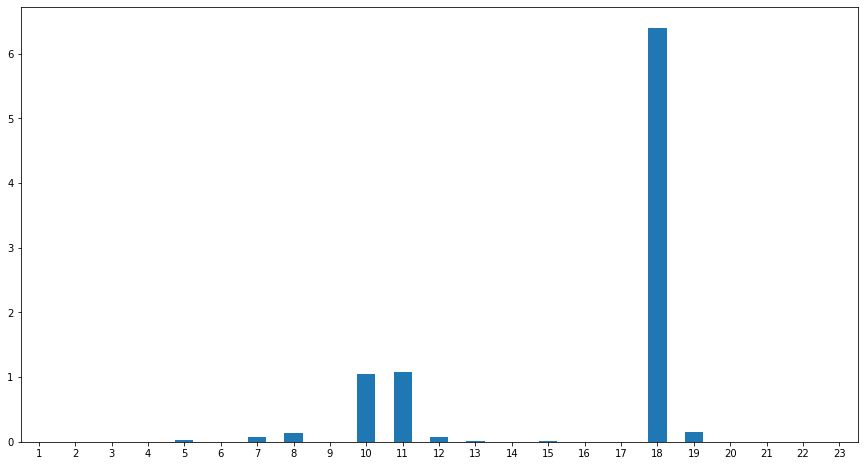

In [146]:
def count_treatments3(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T3'].str.contains(str(i)+'-', na=False) & ~df['T3'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments3 = normalize(count_treatments3(df2[["patient_nbr","T3"]]),101766)
df_freq3 = pd.DataFrame(freq_treatments3, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq3= df_freq3['patient_nbr']
df_freq3.plot.bar(rot=0, figsize=(15, 8))

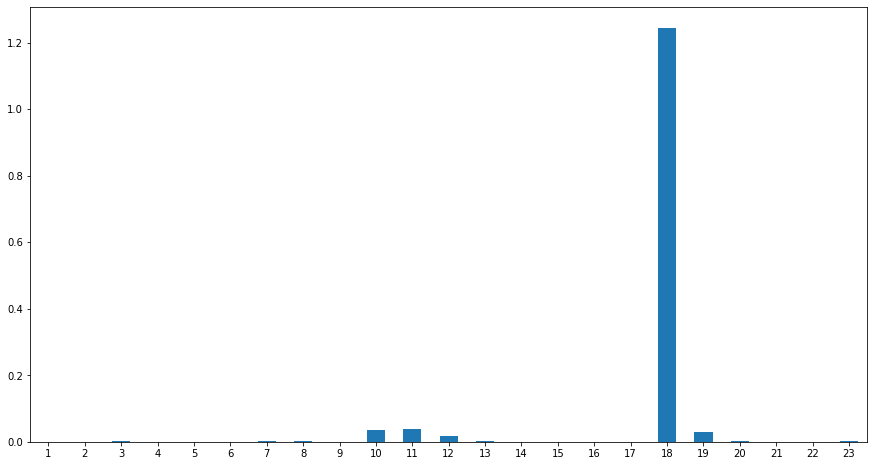

In [147]:
def count_treatments4(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T4'].str.contains(str(i)+'-', na=False) & ~df['T4'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments4 = normalize(count_treatments4(df2[["patient_nbr","T4"]]),101766)
df_freq4 = pd.DataFrame(freq_treatments4, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq4 = df_freq4['patient_nbr']
df_freq4.plot.bar(rot=0, figsize=(15, 8))

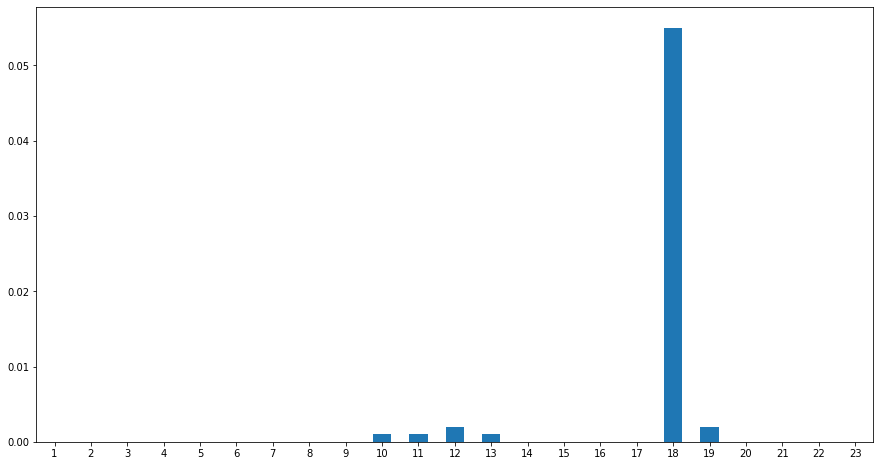

In [148]:
def count_treatments5(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T5'].str.contains(str(i)+'-', na=False) & ~df['T5'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments5 = normalize(count_treatments5(df2[["patient_nbr","T5"]]),101766)
df_freq5 = pd.DataFrame(freq_treatments5, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq5= df_freq5['patient_nbr']
df_freq5.plot.bar(rot=0, figsize=(15, 8))

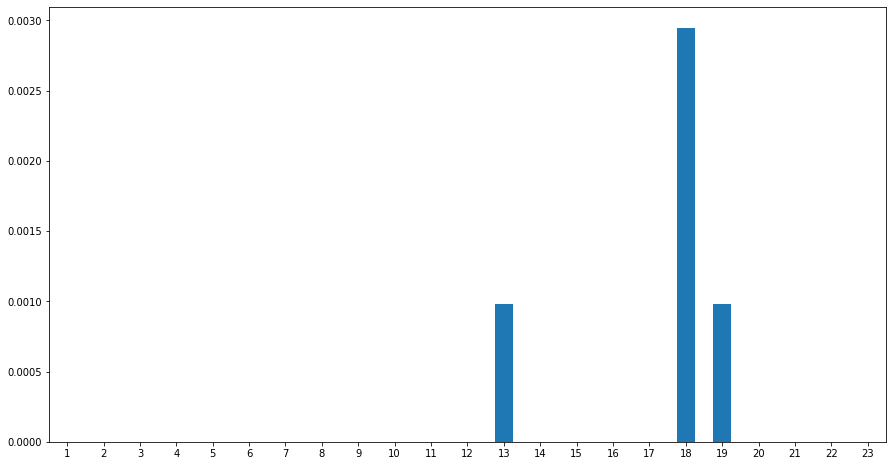

In [149]:
def count_treatments6(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T6'].str.contains(str(i)+'-', na=False) & ~df['T6'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments6 = normalize(count_treatments6(df2[["patient_nbr","T6"]]),101766)
df_freq6 = pd.DataFrame(freq_treatments6, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq6= df_freq6['patient_nbr']
df_freq6.plot.bar(rot=0, figsize=(15, 8))

# Traitement age


In [21]:
df_age = df2[["patient_nbr","age","T1","T2","T3","T4","T5","T6"]]
df_age

,patient_nbr,age,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,
12522,48330783,[80-90),7-Steady,18-Steady,0,0,0,0
15738,63555939,[90-100),11-Steady,18-Steady,0,0,0,0
16680,42519267,[40-50),7-Steady,18-Steady,0,0,0,0
28236,89869032,[40-50),18-Steady,0,0,0,0,0
35754,82637451,[50-60),18-Steady,0,0,0,0,0
...,...,...,...,...,...,...,...,...
443847548,100162476,[70-80),1-Steady,18-Down,0,0,0,0
443847782,74694222,[80-90),18-Steady,0,0,0,0,0
443854148,41088789,[70-80),1-Steady,18-Down,0,0,0,0


In [22]:
df_age=df_age.sort_values(by=['age',"T1","T2","T3","T4","T5","T6"])
df_age

,patient_nbr,age,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,
2278392,8222157,[0-10),0,0,0,0,0,0
10267602,3608811,[0-10),0,0,0,0,0,0
10728900,12615390,[0-10),0,0,0,0,0,0
18476064,5236596,[0-10),0,0,0,0,0,0
18757914,7691157,[0-10),0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
149259144,27950544,[90-100),8-Up,18-Up,0,0,0,0
54269280,24669009,[90-100),9-Steady,0,0,0,0,0
247869696,33069474,[90-100),9-Steady,18-Down,0,0,0,0


In [23]:
df_age_count_values = df_age.groupby("age").count()
df_age_count_values
# Remettre des Null au lieu des 0

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),161,161,161,161,161,161,161
[10-20),691,691,691,691,691,691,691
[20-30),1657,1657,1657,1657,1657,1657,1657
[30-40),3775,3775,3775,3775,3775,3775,3775
[40-50),9685,9685,9685,9685,9685,9685,9685
[50-60),17256,17256,17256,17256,17256,17256,17256
[60-70),22483,22483,22483,22483,22483,22483,22483
[70-80),26068,26068,26068,26068,26068,26068,26068
[80-90),17197,17197,17197,17197,17197,17197,17197


In [24]:
df_age2 = df_age[(df_age['T1'] != 0)].groupby("age").count()
df_age2

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[0-10),133,133,133,133,133,133,133
[10-20),600,600,600,600,600,600,600
[20-30),1315,1315,1315,1315,1315,1315,1315
[30-40),2849,2849,2849,2849,2849,2849,2849
[40-50),7405,7405,7405,7405,7405,7405,7405
[50-60),13401,13401,13401,13401,13401,13401,13401
[60-70),17611,17611,17611,17611,17611,17611,17611
[70-80),20191,20191,20191,20191,20191,20191,20191
[80-90),12914,12914,12914,12914,12914,12914,12914


In [25]:
df_age3 = df_age[(df_age['T1'] != 0)&(df_age['T2'] != 0)].groupby("age").count()
df_age3

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[10-20),38,38,38,38,38,38,38
[20-30),191,191,191,191,191,191,191
[30-40),849,849,849,849,849,849,849
[40-50),2904,2904,2904,2904,2904,2904,2904
[50-60),5643,5643,5643,5643,5643,5643,5643
[60-70),7575,7575,7575,7575,7575,7575,7575
[70-80),8240,8240,8240,8240,8240,8240,8240
[80-90),4933,4933,4933,4933,4933,4933,4933
[90-100),676,676,676,676,676,676,676


In [26]:
df_age4 = df_age[(df_age['T1'] != 0)&(df_age['T2'] != 0)&(df_age['T3'] != 0)].groupby("age").count()
df_age4

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[10-20),4,4,4,4,4,4,4
[20-30),70,70,70,70,70,70,70
[30-40),296,296,296,296,296,296,296
[40-50),973,973,973,973,973,973,973
[50-60),1875,1875,1875,1875,1875,1875,1875
[60-70),2305,2305,2305,2305,2305,2305,2305
[70-80),2277,2277,2277,2277,2277,2277,2277
[80-90),1238,1238,1238,1238,1238,1238,1238
[90-100),138,138,138,138,138,138,138


In [27]:
df_age5 = df_age[(df_age['T1'] != 0)&(df_age['T2'] != 0)&(df_age['T3'] != 0)&(df_age['T4'] != 0)].groupby("age").count()
df_age5

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[20-30),9,9,9,9,9,9,9
[30-40),43,43,43,43,43,43,43
[40-50),159,159,159,159,159,159,159
[50-60),307,307,307,307,307,307,307
[60-70),367,367,367,367,367,367,367
[70-80),339,339,339,339,339,339,339
[80-90),160,160,160,160,160,160,160
[90-100),14,14,14,14,14,14,14


In [28]:
df_age6 = df_age[(df_age['T1'] != 0)&(df_age['T2'] != 0)&(df_age['T3'] != 0)&(df_age['T4'] != 0)&(df_age['T5'] != 0)].groupby("age").count()
df_age6

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[30-40),1,1,1,1,1,1,1
[40-50),9,9,9,9,9,9,9
[50-60),15,15,15,15,15,15,15
[60-70),16,16,16,16,16,16,16
[70-80),16,16,16,16,16,16,16
[80-90),5,5,5,5,5,5,5
[90-100),1,1,1,1,1,1,1


In [29]:
df_age7 = df_age[(df_age['T1'] != 0)&(df_age['T2'] != 0)&(df_age['T3'] != 0)&(df_age['T4'] != 0)&(df_age['T5'] != 0)&(df_age['T6'] != 0)].groupby("age").count()
df_age7

,patient_nbr,T1,T2,T3,T4,T5,T6
age,,,,,,,
[60-70),3,3,3,3,3,3,3
[70-80),1,1,1,1,1,1,1
[80-90),1,1,1,1,1,1,1


# Traitement ethnies


In [124]:
df_race = df2[["patient_nbr","race","T1","T2","T3","T4","T5","T6"]]
df_race = df_race.sort_values(by=['race',"T1","T2","T3","T4","T5","T6"])
df_race = df_race.drop(df_race[df_race.race == ""].index)
df_race

,patient_nbr,race,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,
182796,63000108,AfricanAmerican,0,0,0,0,0,0
550098,21820806,AfricanAmerican,0,0,0,0,0,0
1077924,21820806,AfricanAmerican,0,0,0,0,0,0
2091690,7919802,AfricanAmerican,0,0,0,0,0,0
2223336,558360,AfricanAmerican,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
42006696,18347184,Other,8-Up,18-Steady,0,0,0,0
363097094,114319980,Other,8-Up,18-Steady,0,0,0,0
187196124,93809358,Other,8-Up,18-Up,0,0,0,0


In [125]:
df_race.groupby("race").count()


,patient_nbr,T1,T2,T3,T4,T5,T6
race,,,,,,,
AfricanAmerican,19210,19210,19210,19210,19210,19210,19210
Asian,641,641,641,641,641,641,641
Caucasian,76099,76099,76099,76099,76099,76099,76099
Hispanic,2037,2037,2037,2037,2037,2037,2037
Other,1506,1506,1506,1506,1506,1506,1506


In [126]:
df_afam = df_race.drop(df_race[df_race.race != "AfricanAmerican"].index)
df_as = df_race.drop(df_race[df_race.race != "Asian"].index)
df_c = df_race.drop(df_race[df_race.race != "Caucasian"].index)
df_h= df_race.drop(df_race[df_race.race != "Hispanic"].index)


In [127]:
df_afam

,patient_nbr,race,T1,T2,T3,T4,T5,T6
encounter_id,,,,,,,,
182796,63000108,AfricanAmerican,0,0,0,0,0,0
550098,21820806,AfricanAmerican,0,0,0,0,0,0
1077924,21820806,AfricanAmerican,0,0,0,0,0,0
2091690,7919802,AfricanAmerican,0,0,0,0,0,0
2223336,558360,AfricanAmerican,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
404886392,99986328,AfricanAmerican,8-Up,18-Steady,0,0,0,0
2922318,49453713,AfricanAmerican,8-Up,18-Up,0,0,0,0
140575062,25108155,AfricanAmerican,8-Up,18-Up,0,0,0,0


In [128]:
def count_treatments(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[(df['T1'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T1'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T2'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T2'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T3'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T3'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T4'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T4'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T5'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T5'].astype(str).str.contains(str(i+10)+'-', na=False)) | (df['T6'].astype(str).str.contains(str(i)+'-', na=False) & ~df['T6'].astype(str).str.contains(str(i+10)+'-', na=False))].count()
        contained.append(contain_values)
    return contained

In [129]:
values_afam = count_treatments(df_afam)
values_as = count_treatments(df_as)
values_c = count_treatments(df_c)
values_h = count_treatments(df_h)

In [130]:
values_afam_norm = normalize(values_afam, 19210)
values_as_norm = normalize(values_as, 641)
values_c_norm = normalize(values_c, 76099)
values_h_norm = normalize(values_h, 2037)
df_afam_norm = pd.DataFrame(values_afam_norm,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_afam_norm = df_afam_norm.rename(columns={"patient_nbr": "AfricanAmerican"}).drop(["race","T1","T2","T3","T4","T5","T6"], axis=1)
df_as_norm = pd.DataFrame(values_as_norm,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_as_norm = df_as_norm.rename(columns={"patient_nbr": "Asian"}).drop(["race","T1","T2","T3","T4","T5","T6"], axis=1)
df_c_norm = pd.DataFrame(values_c_norm,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_c_norm = df_c_norm.rename(columns={"patient_nbr": "Caucasian"}).drop(["race","T1","T2","T3","T4","T5","T6"], axis=1)
df_h_norm = pd.DataFrame(values_h_norm,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_h_norm = df_h_norm.rename(columns={"patient_nbr": "Hispanic"}).drop(["race","T1","T2","T3","T4","T5","T6"], axis=1)


In [131]:
df_races= pd.concat([df_afam_norm, df_as_norm, df_c_norm, df_h_norm], axis=1)
df_races

,AfricanAmerican,Asian,Caucasian,Hispanic
1,18.214472,17.940718,19.883310,23.613157
2,0.926601,2.652106,1.668879,1.767305
3,0.853722,1.560062,0.647840,0.687285
4,0.031234,0.000000,0.099870,0.098184
5,4.232171,3.900156,5.303618,3.436426
6,0.000000,0.000000,0.001314,0.000000
7,10.983863,13.728549,12.782034,12.763868
8,8.771473,10.764431,10.910787,8.885616
9,0.005206,0.000000,0.027596,0.000000
10,5.747007,7.176287,7.584857,7.805596


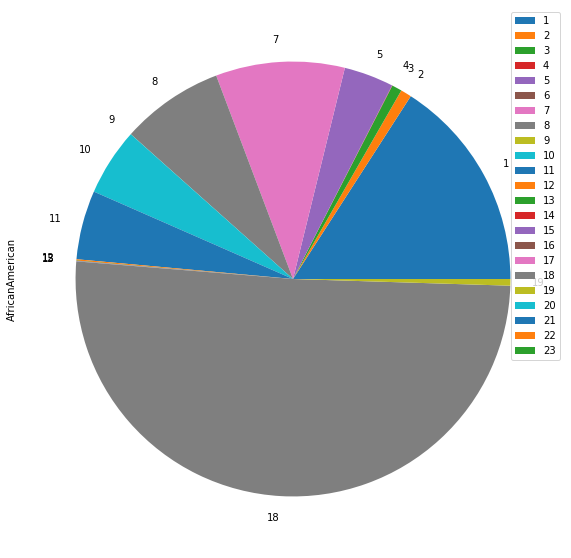

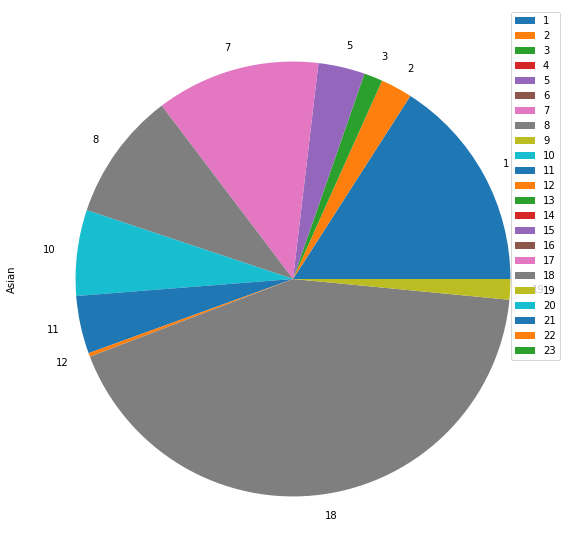

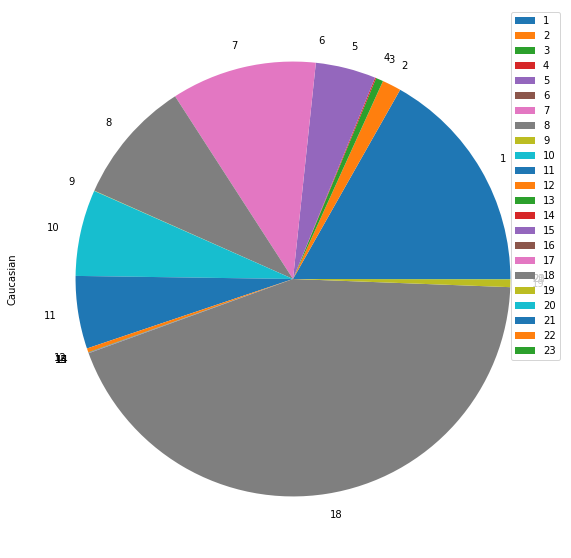

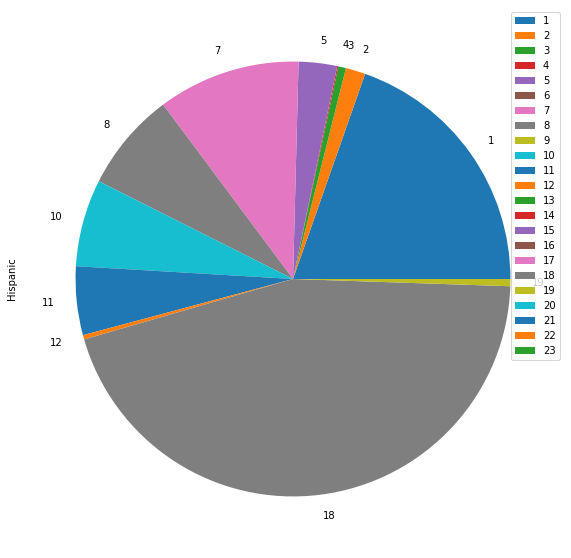

In [136]:
plot_afam = df_afam_norm.plot.pie(y='AfricanAmerican', figsize=(10, 10))
plot_as = df_as_norm.plot.pie(y='Asian', figsize=(10, 10))
plot_c = df_c_norm.plot.pie(y='Caucasian', figsize=(10, 10))
plot_h = df_h_norm.plot.pie(y='Hispanic', figsize=(10, 10))

In [ ]:
#Freq Steady Up, Down chaque traitement, voire en fonction de la position 
#Ecrire conclusions sur traitment qui mene à un autre